In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')

In [47]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [50]:
# Drop useless columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Convert target column 'diagnosis' to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [51]:
# Check if everything looks fine
print(df.head())
print(df['diagnosis'].value_counts())


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [52]:
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler only on training data
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Done!
print("Training and testing data prepared.")


Training and testing data prepared.


In [53]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [54]:
# Create the model
model = LogisticRegression()

In [55]:
# Train (fit) the model
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
#  Make predictions on the test set
y_pred = model.predict(X_test)

In [57]:
# Step 5: Show predictions
print("Predicted labels:", y_pred[:10])
print("Actual labels   :", y_test.values[:10])

Predicted labels: [0 1 1 0 0 1 1 1 0 0]
Actual labels   : [0 1 1 0 0 1 1 1 0 0]


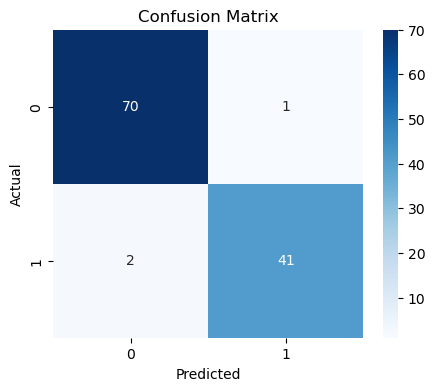

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [60]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9761904761904762


In [61]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9534883720930233


In [62]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9647058823529412


In [63]:
# ROC AUC Score
y_prob = model.predict_proba(X_test)[:, 1]  # get probability for class 1
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.99737962659679


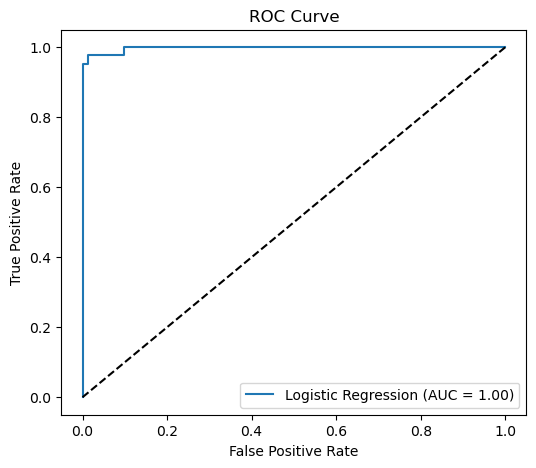

In [64]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

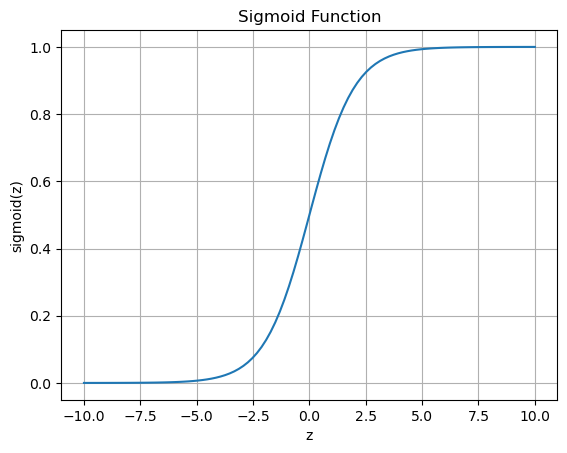

In [65]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

# Plot
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

In [45]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Try a lower threshold (more sensitive to malignant cases)
threshold = 0.3
y_pred_thresh = (y_prob >= threshold).astype(int)

# Compare metrics at new threshold
from sklearn.metrics import classification_report
print(f"Classification Report at Threshold = {threshold}")
print(classification_report(y_test, y_pred_thresh))

Classification Report at Threshold = 0.3
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

